In [175]:
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt

In [176]:
file  = 'Resources/ped_data.csv'
fileb = 'Resources/t_test.csv'
filec = 'Resources/jan_11years.csv'

In [177]:
df = pd.read_csv(file)
df2 = pd.read_csv(fileb)
df3 = pd.read_csv(filec)

# DATA CLEANSING STEPS PERFORMED SEPERATELY AS FOLLOWS
 Step1: CSV files with hourly data per month was downloaded from http://www.pedestrian.melbourne.vic.gov.au/
 Step2: SUM and Average functions were used in csv files to get total amount of pedestrians for that month per sensor.
 Step3: A new csv file was created where the final total results from above were copied
 that final csv file was stored as ped_data.csv
 Step5: ped_data.csv was opened in this jupyter notebook

In [178]:
#printing the dataframe head
df.set_index('Month').head()


,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,Southern Cross Station,Victoria Point,...,QVM-Queen St (East),QVM-Therry St (South),Faraday St-Lygon St (West),QVM-Franklin St (North),Elizabeth St-Lonsdale St (South),Lonsdale St - Elizabeth St (North),Bourke St Bridge,Bourke St - Spencer St (North),RMIT Bld 80 - 445 Swanston Street,RMIT Building 14
Month,,,,,,,,,,,,,,,,,,,,,
Aug-19,906524,641786,981893,1064689,963378,1051024,324456,144995,621153,155030,...,206593,137175,193302,99286,325035,254486,858474,628506,141713,510872
Sep-19,943758,643780,869674,971314,925437,1008301,234247,140767,561236,131512,...,179612,93315,184283,87344,313040,233348,484876,560959,113007,412081
Oct-19,1028680,495941,919196,1047185,1028103,1151297,187355,58490,638247,148089,...,194461,94980,205178,101168,332225,237426,501533,632111,133967,459405
Nov-19,1037267,744945,901523,1074747,673975,1105507,320914,137894,536947,134803,...,205257,135467,205253,94935,328209,198465,551299,598612,96558,323670
Dec-19,1192463,927155,911297,1244392,1068849,1187116,209137,146964,442756,118303,...,207353,132729,223789,97110,310402,250344,381784,545728,83645,266536


In [179]:
df['Bourke Street Mall (North)'].max()

1192463

In [180]:
df['Bourke Street Mall (North)'].min()

70531

In [181]:
# creating empty lists
maxall = []
minall = []
columns = []
dif = []

In [182]:
#gathering all column names in a list
for column in df.columns:
    columns.append(column)

In [183]:
#removing month column
columns.pop(0)

'Month'

In [184]:
# creating max list
for i in columns:
    maxall.append(df[i].max())

In [185]:
#creating min list
for i in columns:
    minall.append(df[i].min())

In [186]:
len(columns)

47

In [187]:
for x, y in zip(maxall, minall):
    dif.append((x-y)*100/x)

In [188]:
# to find greatest drop in number
greatest = 0
for x in dif:
    if x > greatest:
        greatest = x

print(dif.index(greatest))

35


In [189]:
columns[35]

'Pelham St (South)'

In [190]:
#to find least drop
smallest = greatest
for x in dif:
    if x < smallest:
        smallest = x

print(dif.index(smallest))

38


In [191]:
print('The largest drop of ' + str(greatest) + ' percent was recorded at ' + str(columns[35]))
print('The smallest drop of ' + str(smallest) + ' percent was recorded in ' + str(columns[38]))

The largest drop of 97.85764724187042 percent was recorded at Pelham St (South)
The smallest drop of 56.55476581009659 percent was recorded in QVM-Therry St (South)


In [192]:
maxall[38]

137175

In [193]:
totaldif = 0
for x in dif:
    totaldif = totaldif + x
averagedrop = totaldif/len(dif)
print('The average drop in the pedestrian activity was found to be ' + str(averagedrop))

The average drop in the pedestrian activity was found to be 87.24970885026167


In [194]:
# creating a DataFrame for ttest
df2['QVM-Therry St (South)'] = df['QVM-Therry St (South)']
df2['Pelham St (South)'] = df['Pelham St (South)']
df2

,Total,QVM-Therry St (South),Pelham St (South)
0,20514686,137175,83553
1,18400508,93315,77593
2,19559400,94980,77533
3,19096264,135467,66638
4,19391486,132729,40181
5,18109838,101256,42714
6,16858818,95164,56911
7,12495970,85517,59855
8,2942258,63224,12079
9,4536450,80665,15479


In [195]:
df2.to_csv('Analysis/abc.csv')

In [196]:
stats.ttest_ind(df2['Total'], df2['QVM-Therry St (South)'], equal_var=False)

Ttest_indResult(statistic=8.026216493241861, pvalue=2.9776823362646984e-08)

In [197]:
stats.ttest_ind(df2['Total'], df2['Pelham St (South)'], equal_var=False)

Ttest_indResult(statistic=8.065901442707357, pvalue=2.727993159440689e-08)

In [198]:
df2["A"] = pd.Series(list(range(len(df2))))


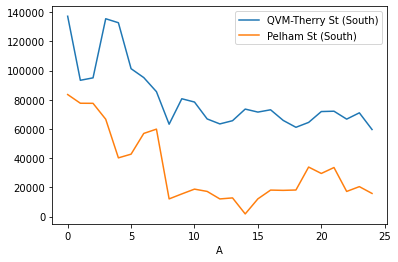

In [199]:

pic1 = df2.plot(x='A', y=['QVM-Therry St (South)', 'Pelham St (South)'])


Text(0.5, 0, 'Time period')

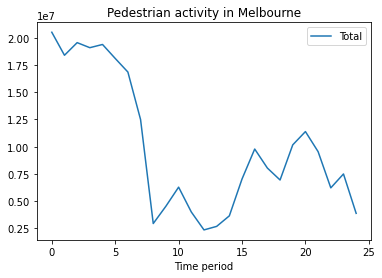

In [200]:
pic2 = df2.plot(x='A' , y=['Total'])
plt.title('Pedestrian activity in Melbourne')
plt.xlabel('Time period')


In [201]:
df3

,Year,pedestrian_count
0,2010,410837
1,2011,422883
2,2012,441730
3,2013,455130
4,2014,413426
5,2015,344559
6,2016,439079
7,2017,371597
8,2018,410882
9,2019,429772


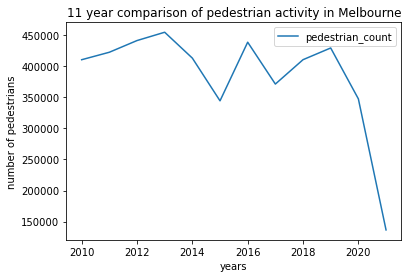

In [202]:
pic3 = df3.plot(x='Year',y='pedestrian_count')
plt.title('11 year comparison of pedestrian activity in Melbourne')
plt.xlabel('years')
plt.ylabel('number of pedestrians')
plt.show()
pic3.figure.savefig('Analysis/pic3.png')

In [203]:
pic1.figure.savefig('Analysis/pic1.png')

pic2.figure.savefig('Analysis/pic2.png')